In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from PIL import Image
import random
import shutil

In [96]:
batch_size = 32
img_height = 260
img_width = 260
path = '/home/steve/Vorlesungen/Artificial_Intelligence_Burghart/KI-Projekt-RKIM22-23/data_cropped'

train_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1328 files belonging to 4 classes.
Using 1063 files for training.


In [97]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  path,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 1328 files belonging to 4 classes.
Using 265 files for validation.


In [98]:
class_names = train_ds.class_names
print(class_names)

['broken', 'closed_seal_broken', 'closed_sealed', 'open_broken']


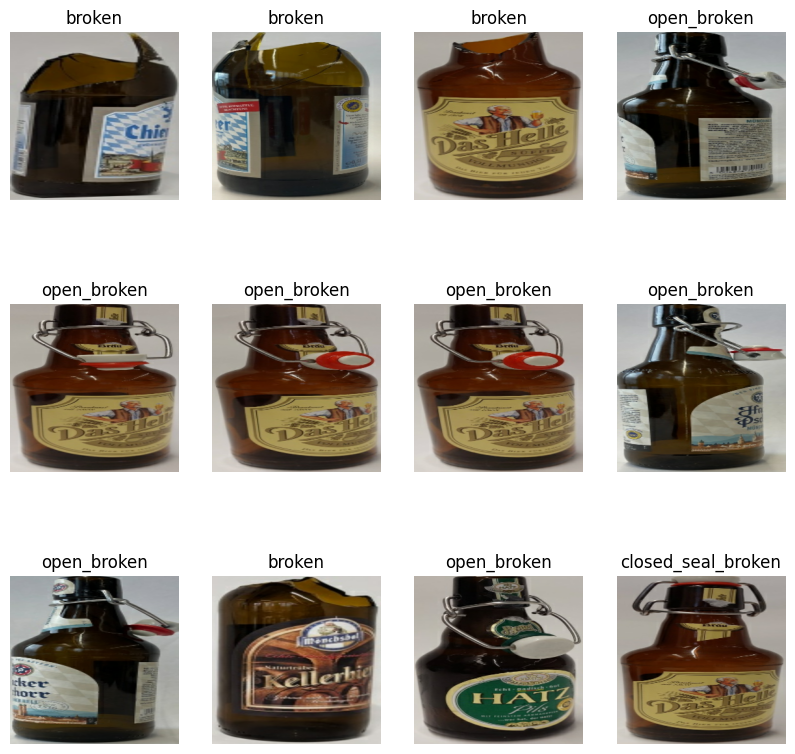

In [99]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(12):
    ax = plt.subplot(3, 4, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [100]:
# AUTOTUNE = tf.data.AUTOTUNE

# train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
# val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [101]:
# from tensorflow import keras
# from keras import layers
# num_classes = len(class_names)
# #example model tf
# model = keras.models.Sequential([
#   layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
#   layers.Conv2D(16, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(32, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Conv2D(64, 3, padding='same', activation='relu'),
#   layers.MaxPooling2D(),
#   layers.Dropout(0.3),
#   layers.Flatten(),
#   layers.Dense(128, activation='relu'),
#   layers.Dense(num_classes, activation='softmax')
#   ])
# model.summary()

In [102]:
from tensorflow import keras
from keras import layers
num_classes = len(class_names)

model = keras.models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.6),
  layers.Flatten(),
  layers.Dense(256, activation='relu'),
  layers.Dense(num_classes,activation='softmax')
])
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 260, 260, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 260, 260, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 130, 130, 16)     0         
 g2D)                                                            
                                                                 
 conv2d_22 (Conv2D)          (None, 130, 130, 32)      4640      
                                                                 
 max_pooling2d_22 (MaxPoolin  (None, 65, 65, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_23 (Conv2D)          (None, 65, 65, 64)       

In [103]:
from tensorflow.keras.callbacks import EarlyStopping,ReduceLROnPlateau
early_stopping = EarlyStopping(
    patience=6
)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.6,
                              patience=2, min_lr=0.00001)

#no early stopping to streamline the epochs plot

callbacks = [reduce_lr]






In [104]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

In [105]:
epochs=22
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs,
  callbacks=[callbacks]
)

Epoch 1/22
34/34 [==============================] - 8s 213ms/step - loss: 1.1014 - accuracy: 0.6049 - val_loss: 0.3449 - val_accuracy: 0.8642 - lr: 0.0010
Epoch 2/22
34/34 [==============================] - 7s 216ms/step - loss: 0.2615 - accuracy: 0.8928 - val_loss: 0.2109 - val_accuracy: 0.9170 - lr: 0.0010
Epoch 3/22
34/34 [==============================] - 7s 215ms/step - loss: 0.0933 - accuracy: 0.9633 - val_loss: 0.1137 - val_accuracy: 0.9660 - lr: 0.0010
Epoch 4/22
34/34 [==============================] - 7s 217ms/step - loss: 0.0384 - accuracy: 0.9897 - val_loss: 0.1064 - val_accuracy: 0.9660 - lr: 0.0010
Epoch 5/22
34/34 [==============================] - 7s 218ms/step - loss: 0.0479 - accuracy: 0.9802 - val_loss: 0.1152 - val_accuracy: 0.9660 - lr: 0.0010
Epoch 6/22
34/34 [==============================] - 8s 221ms/step - loss: 0.0333 - accuracy: 0.9887 - val_loss: 0.1231 - val_accuracy: 0.9434 - lr: 0.0010
Epoch 7/22
34/34 [==============================] - 8s 235ms/step - lo

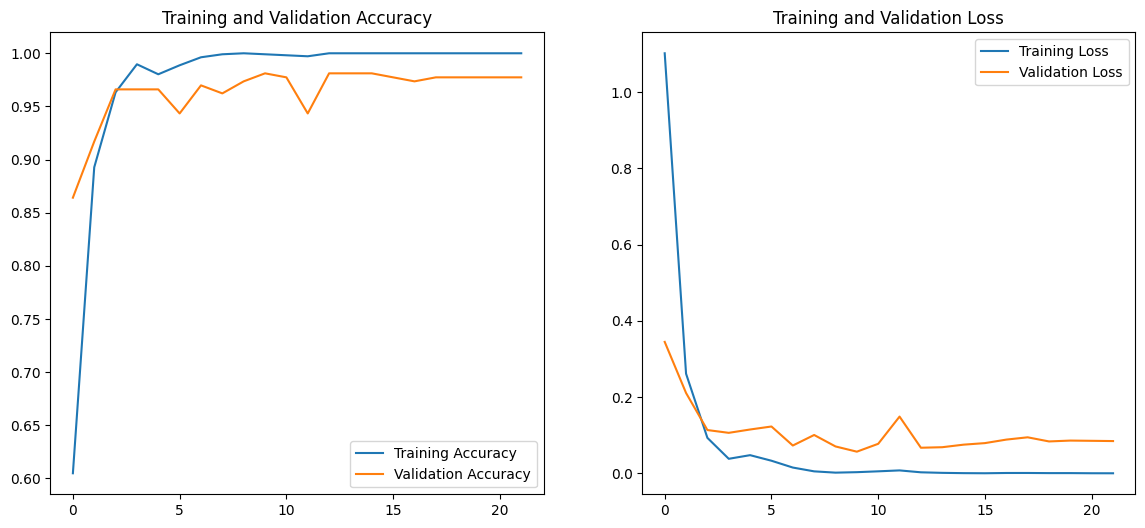

In [106]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [32]:
# path_test = "/home/steve/Vorlesungen/Artificial_Intelligence_Burghart/KI-Projekt-RKIM22-23/open.jpg"
# sunflower_path = tf.keras.utils.get_file('open', 'file://'+path_test)

In [33]:

# print(sunflower_path)

# img = tf.keras.utils.load_img(
#     sunflower_path, target_size=(img_height, img_width)
# )
# img_array = tf.keras.utils.img_to_array(img)
# img_array = tf.expand_dims(img_array, 0) # Create a batch
# img


Creating a test dataset

In [107]:
path_test = '/home/steve/Vorlesungen/Artificial_Intelligence_Burghart/KI-Projekt-RKIM22-23/test_images_cropped'
test_batchsize = 4

test_ds = tf.keras.utils.image_dataset_from_directory(
  path_test,
  seed=123,
  image_size=(img_height, img_width),
  batch_size=test_batchsize
)

results= model.evaluate(test_ds)
print(f"test loss: {results[0]}: test acc: {results[1]*100}%")




Found 4 files belonging to 4 classes.
1/1 [==============================] - 0s 30ms/step - loss: 0.2983 - accuracy: 0.7500
test loss: 0.2983189821243286: test acc: 75.0%


In [108]:
# Generate predictions (probabilities -- the output of the last layer)
# on new data using `predict`

predictions = model.predict(test_ds)
for i in range(len(predictions)):
  score = tf.nn.softmax(predictions[i])
  print(f"\nPrediction is:{format(class_names[np.argmax(score)])} with {100 * np.max(score)}% confidence")


1/1 [==============================] - 0s 75ms/step

Prediction is:open_broken with 47.532981634140015% confidence

Prediction is:closed_seal_broken with 37.38882541656494% confidence

Prediction is:closed_seal_broken with 47.38393425941467% confidence

Prediction is:broken with 47.53669202327728% confidence


1/1 [==============================] - 0s 19ms/step


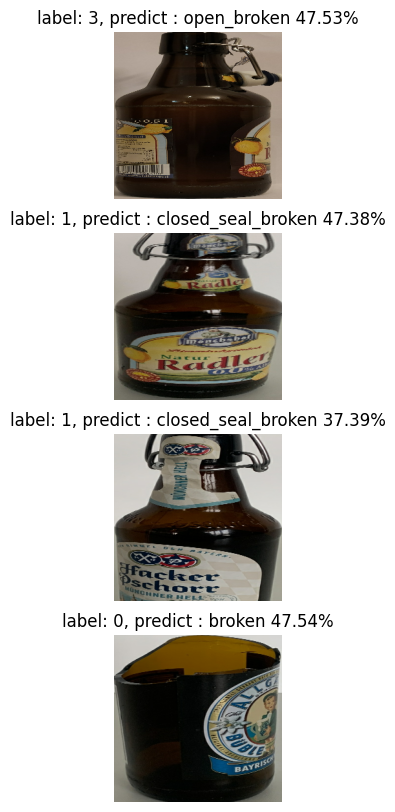

In [109]:
image ,label = next(iter(test_ds))
fig, axes = plt.subplots(4,1,figsize=(10,10))
for idx, axe in enumerate(axes.flatten()):
    axe.axis('off')
    pred = model.predict(image[idx][None,...])
    y_pred = np.argmax(pred)
    score = tf.nn.softmax(pred)
    axe.imshow(image[idx].numpy().astype("uint8"))
    axe.set_title(f'label: {y_pred}, predict : {class_names[y_pred]} {100 * np.max(score):.2f}%')